In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from util import*

In [3]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [4]:
ds = download_skl_dataset(download_path)

In [5]:
data, target, feature_names, DESCR = data_process(ds)

In [6]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [7]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [8]:
reg = LinearRegression().fit(x_train, y_train)

In [9]:
reg.score(x_train, y_train)

0.6026904368444415

In [10]:
y_pred = reg.predict(x_test)

In [11]:
mse = np.mean(((y_pred - y_test)**2))
print(mse)

0.5088458995617896


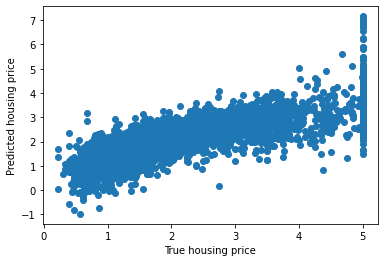

In [12]:
plot_pred_true(x_test, y_test, y_pred)

In [13]:
cur_path = os.getcwd()

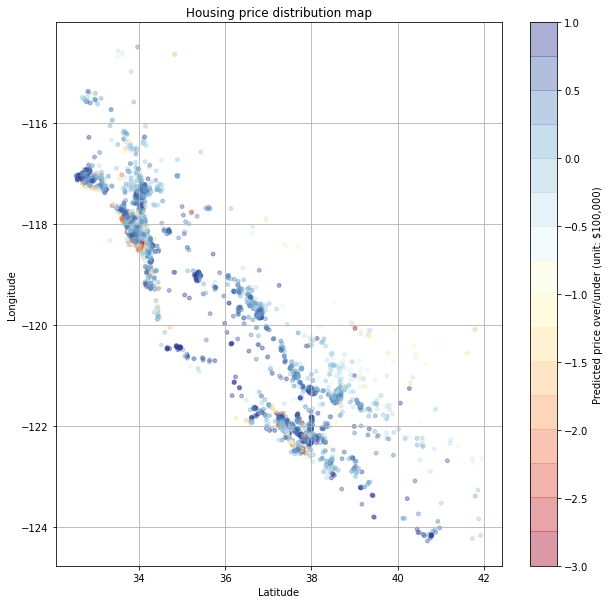

In [14]:
# Plot land map
save_path = cur_path + '/figures/linear_regression_train_mse_test_mse.png'
land_map(x_test*std_data + mean_data, y_pred - y_test, save_path=save_path, bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)